In [31]:
# Install the ultralytics package using pip
!pip install ultralytics

In [32]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

Import Model with pre-trained weights

In [10]:
#Instance
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

In [11]:
# Define the file path
file_path = "/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/data.yaml"

# Open the file and read its contents
with open(file_path, "r") as file:
    data_yaml_contents = file.read()

# Display the contents
print(data_yaml_contents)

names:
- VM
nc: 1
test: ../test/images
train: /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/train/images
val: /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/valid/images



In [12]:

# define number of classes based on YAML
import yaml
with open("/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [13]:
#Define a project --> Destination directory for all results
project = "/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results"
#Define subdirectory for this specific training
name = "200_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

In [14]:
# Train the model
results = model.train(data='/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/data.yaml',
                      project=project,
                      name=name,
                      epochs=200,
                      patience=0, # setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=800)

Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/data.yaml, epochs=200, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results, name=200_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

100%|██████████| 755k/755k [00:00<00:00, 17.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 82.5MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/train/labels... 89 images, 0 backgrounds, 0 corrupt: 100%|██████████| 89/89 [01:05<00:00,  1.36it/s]

train: New cache created: /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/valid/labels... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

val: New cache created: /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/valid/labels.cache


Plotting labels to /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200       1.3G       1.81      4.196      4.412      1.815          2        800: 100%|██████████| 23/23 [00:08<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all          6         19   0.000556     0.0526   0.000306   0.000184   0.000556     0.0526   0.000306   3.06e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      1.35G       1.52      3.016      3.581      1.338          3        800: 100%|██████████| 23/23 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


                   all          6         19      0.005      0.474      0.185      0.049      0.005      0.474     0.0922     0.0333

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200       1.4G      1.505      2.609      2.919      1.282          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]


                   all          6         19    0.00167      0.158    0.00229   0.000816    0.00167      0.158    0.00231    0.00125

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      1.33G      1.699      2.812      3.253      1.377          6        800: 100%|██████████| 23/23 [00:05<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all          6         19    0.00222      0.211     0.0566     0.0394    0.00222      0.211     0.0566     0.0392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      1.23G      1.669      2.579      3.155      1.467          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all          6         19    0.00222      0.211    0.00437    0.00176    0.00278      0.263    0.00467    0.00201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      1.38G      1.702       3.08      2.963      1.522          7        800: 100%|██████████| 23/23 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all          6         19    0.00444      0.421    0.00418    0.00173    0.00444      0.421     0.0047      0.002



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.33G      1.687      2.501      2.883      1.485          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all          6         19     0.0583      0.211     0.0352       0.02     0.0729      0.263     0.0371     0.0198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      1.24G      1.712      2.638      2.717      1.424          8        800: 100%|██████████| 23/23 [00:04<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all          6         19      0.265      0.263      0.163      0.076      0.323      0.316      0.199     0.0867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      1.27G      1.652      2.706      2.792      1.435          2        800: 100%|██████████| 23/23 [00:05<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all          6         19      0.187      0.263      0.104     0.0458      0.187      0.263      0.131     0.0538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      1.34G        1.7      2.812      3.047      1.484          7        800: 100%|██████████| 23/23 [00:04<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


                   all          6         19      0.504      0.211      0.156     0.0859      0.504      0.211      0.156     0.0819

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      1.22G      1.727      2.789      2.828       1.56          3        800: 100%|██████████| 23/23 [00:05<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all          6         19      0.313      0.263      0.193     0.0944      0.235      0.263      0.173     0.0851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      1.25G      1.572      2.469      3.018      1.401          0        800: 100%|██████████| 23/23 [00:04<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


                   all          6         19      0.262      0.474      0.237      0.129      0.262      0.474      0.233      0.115

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      1.36G      1.571      2.399      2.534      1.438          8        800: 100%|██████████| 23/23 [00:04<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all          6         19      0.265      0.455      0.306      0.167      0.265      0.455      0.305      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      1.25G       1.57      2.333      2.432      1.395         11        800: 100%|██████████| 23/23 [00:05<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all          6         19      0.276      0.211      0.225      0.107      0.299      0.248      0.209     0.0976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      1.25G      1.603      2.367      2.445       1.44          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all          6         19      0.503      0.158      0.195      0.109      0.336      0.263      0.224      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      1.29G      1.553      2.399      2.379      1.427          1        800: 100%|██████████| 23/23 [00:05<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all          6         19      0.293      0.421      0.225      0.125      0.313      0.337      0.258      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      1.24G      1.499      2.425      2.398       1.37          8        800: 100%|██████████| 23/23 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]


                   all          6         19      0.418      0.211      0.156     0.0761      0.418      0.211      0.177     0.0833

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      1.31G      1.555      2.402      2.222      1.448          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]


                   all          6         19      0.538      0.263      0.248      0.122      0.538      0.263      0.244      0.127

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      1.23G      1.457       2.29      2.086      1.322         10        800: 100%|██████████| 23/23 [00:05<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all          6         19      0.231      0.427      0.307      0.174      0.231      0.427      0.304      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      1.39G      1.567       2.41      2.253      1.446          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          6         19      0.502      0.368      0.416      0.195      0.502      0.368      0.415      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      1.25G      1.489      2.389      2.028      1.405          3        800: 100%|██████████| 23/23 [00:05<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all          6         19       0.61       0.33      0.348      0.159       0.61       0.33      0.348      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      1.25G      1.566       2.25      2.151      1.434          1        800: 100%|██████████| 23/23 [00:04<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


                   all          6         19      0.448      0.316      0.405      0.178      0.434      0.316      0.409      0.178

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      1.36G      1.603      2.435      2.014      1.411          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all          6         19      0.417      0.316      0.299      0.139      0.417      0.316      0.274      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      1.34G      1.519        2.2      1.979       1.36          2        800: 100%|██████████| 23/23 [00:05<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


                   all          6         19      0.267      0.316      0.264      0.112      0.267      0.316      0.265      0.105

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      1.25G      1.504      2.162      1.899      1.416          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all          6         19      0.509      0.368      0.403       0.21      0.509      0.368      0.403      0.217



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      1.29G       1.41      2.199      1.811      1.305          3        800: 100%|██████████| 23/23 [00:05<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all          6         19      0.791        0.4      0.503      0.292      0.749      0.368      0.478      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      1.32G      1.389      2.229      1.805      1.278          6        800: 100%|██████████| 23/23 [00:04<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all          6         19      0.588      0.421      0.407      0.232      0.588      0.421      0.411      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      1.24G      1.422      2.092      1.822      1.364          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all          6         19      0.546      0.421      0.445      0.245       0.54      0.421      0.452      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      1.24G      1.436       2.33       1.69      1.316          9        800: 100%|██████████| 23/23 [00:05<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all          6         19      0.564      0.205      0.274      0.143      0.564      0.205      0.276      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      1.35G      1.482      2.452      1.803      1.314          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]


                   all          6         19      0.651      0.394      0.411      0.225      0.651      0.394      0.411      0.189

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      1.24G      1.426      2.263      1.872      1.333          5        800: 100%|██████████| 23/23 [00:05<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all          6         19      0.593      0.368      0.409      0.164      0.539      0.316      0.369      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      1.22G      1.404      2.141      1.746      1.311          9        800: 100%|██████████| 23/23 [00:03<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all          6         19      0.312      0.421      0.281      0.139      0.312      0.421      0.277      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      1.32G      1.421      2.226      1.723      1.301          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all          6         19      0.415      0.474      0.362      0.228      0.415      0.474      0.362       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      1.35G      1.319      2.024       1.45      1.266          3        800: 100%|██████████| 23/23 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all          6         19      0.599      0.368      0.401      0.259      0.599      0.368        0.4      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      1.41G      1.356       2.08       1.55      1.279          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]


                   all          6         19      0.565      0.478       0.46      0.304      0.565      0.478      0.448      0.241

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      1.28G       1.41      2.363       1.63      1.299          3        800: 100%|██████████| 23/23 [00:04<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all          6         19      0.717      0.579      0.572      0.384      0.717      0.579      0.561      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      1.22G      1.409      2.146      1.618      1.289          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]


                   all          6         19      0.909      0.524      0.579      0.367      0.909      0.524      0.572      0.331

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      1.25G        1.4      2.275      1.681      1.262          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all          6         19      0.739      0.368      0.497      0.311      0.494      0.526      0.503       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      1.25G      1.528      2.206      1.793       1.45          1        800: 100%|██████████| 23/23 [00:05<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


                   all          6         19      0.631       0.45      0.521      0.303      0.631       0.45      0.511      0.251

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      1.29G      1.334      2.178      1.633      1.247          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]


                   all          6         19      0.318      0.526      0.425      0.222      0.471      0.474      0.446       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      1.36G      1.316      2.153      1.427      1.237          3        800: 100%|██████████| 23/23 [00:04<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all          6         19      0.445      0.422      0.466      0.262      0.369      0.554      0.475      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      1.25G        1.4      2.231      1.635      1.253          2        800: 100%|██████████| 23/23 [00:04<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


                   all          6         19       0.66      0.613      0.557       0.29      0.633      0.632      0.563      0.306

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      1.29G      1.309      1.956      1.708      1.323          2        800: 100%|██████████| 23/23 [00:03<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all          6         19      0.561      0.632      0.541      0.264      0.561      0.632      0.533      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      1.27G      1.361      2.121      1.582      1.264          1        800: 100%|██████████| 23/23 [00:05<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]


                   all          6         19      0.591      0.456      0.461      0.234      0.591      0.456       0.45      0.254

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      1.28G      1.304      2.066      1.425      1.237          7        800: 100%|██████████| 23/23 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]

                   all          6         19      0.421       0.65       0.46       0.29      0.421       0.65       0.46      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      1.28G      1.149      1.862      1.605      1.141          0        800: 100%|██████████| 23/23 [00:04<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all          6         19      0.425      0.474      0.449       0.26      0.425      0.474      0.449      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      1.38G      1.283      2.062       1.57      1.243          1        800: 100%|██████████| 23/23 [00:05<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]


                   all          6         19      0.355      0.522      0.341      0.191      0.355      0.522       0.34      0.194

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200      1.36G      1.284      1.911      1.413      1.227          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]

                   all          6         19      0.375      0.474      0.333      0.155      0.375      0.474      0.328      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200      1.35G      1.238      1.924      1.384      1.226          3        800: 100%|██████████| 23/23 [00:05<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all          6         19       0.57      0.627      0.583      0.272       0.57      0.627      0.572      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      1.24G      1.186      1.893      1.553      1.153          0        800: 100%|██████████| 23/23 [00:03<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all          6         19      0.658      0.474      0.578      0.306      0.658      0.474      0.564      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      1.29G      1.257      1.992      1.383       1.22          9        800: 100%|██████████| 23/23 [00:04<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all          6         19      0.508      0.436      0.543      0.288      0.488      0.526      0.543      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200      1.38G      1.385      2.218       1.43      1.275          2        800: 100%|██████████| 23/23 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all          6         19      0.535      0.526      0.492      0.254       0.47      0.632      0.514       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      1.33G       1.26      1.863      1.353      1.198         10        800: 100%|██████████| 23/23 [00:04<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]


                   all          6         19      0.423      0.684      0.628      0.373      0.423      0.684      0.625      0.327

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      1.24G      1.298      2.053      1.357      1.276          2        800: 100%|██████████| 23/23 [00:04<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all          6         19      0.533      0.632      0.588      0.385      0.533      0.632      0.588      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      1.22G      1.312      2.153      1.296      1.259          2        800: 100%|██████████| 23/23 [00:03<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all          6         19      0.337      0.684      0.482      0.319      0.337      0.684      0.482      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      1.33G      1.242      1.983      1.431      1.236          1        800: 100%|██████████| 23/23 [00:03<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


                   all          6         19      0.643      0.368      0.454      0.251      0.643      0.368      0.454      0.226

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      1.41G      1.278      1.962      1.493      1.194          0        800: 100%|██████████| 23/23 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]

                   all          6         19      0.699      0.474      0.518      0.271      0.699      0.474      0.517      0.229



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      1.27G      1.242      1.964      1.526      1.204          0        800: 100%|██████████| 23/23 [00:04<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all          6         19      0.641      0.526      0.459      0.243      0.641      0.526      0.449      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      1.31G      1.281      2.149      1.347      1.207          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all          6         19      0.573      0.474      0.439      0.243       0.64      0.526      0.502      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200       1.3G      1.115      1.835      1.203      1.141          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]


                   all          6         19      0.523      0.368      0.442      0.259      0.565      0.421       0.48      0.253

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200      1.26G      1.194      1.908      1.225      1.192          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all          6         19      0.395      0.412      0.404      0.249      0.747      0.312      0.439      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200      1.36G      1.349       2.12      1.437       1.33          3        800: 100%|██████████| 23/23 [00:05<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


                   all          6         19      0.543      0.421      0.381       0.18      0.549      0.421      0.367      0.191

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      1.26G      1.235      1.915      1.316      1.213          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]


                   all          6         19      0.475      0.368      0.347      0.209      0.475      0.368      0.361      0.202

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      1.33G      1.276      1.994      1.489      1.258          6        800: 100%|██████████| 23/23 [00:04<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all          6         19      0.455      0.396       0.38      0.243      0.455      0.396      0.383      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      1.27G      1.245       1.87      1.191      1.226          3        800: 100%|██████████| 23/23 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all          6         19      0.443      0.474      0.416      0.237      0.493      0.526       0.43      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      1.24G       1.26      1.922      1.281      1.209          8        800: 100%|██████████| 23/23 [00:04<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all          6         19      0.578      0.526      0.473      0.302      0.578      0.526      0.469      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      1.38G      1.184      1.886      1.183       1.17          8        800: 100%|██████████| 23/23 [00:05<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]

                   all          6         19      0.623      0.474      0.468       0.32      0.623      0.474      0.467      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200      1.35G      1.198       1.79      1.226      1.204          7        800: 100%|██████████| 23/23 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]


                   all          6         19      0.661      0.412      0.451      0.305      0.661      0.412      0.448      0.275

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200      1.36G      1.177      1.889      1.298      1.201          7        800: 100%|██████████| 23/23 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all          6         19      0.532      0.418      0.451      0.288      0.532      0.418      0.446      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      1.26G      1.276      1.969      1.407      1.276          1        800: 100%|██████████| 23/23 [00:05<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all          6         19      0.543      0.526      0.448      0.287      0.543      0.526      0.443      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200      1.27G      1.201      1.894      1.235      1.177          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


                   all          6         19       0.65      0.526      0.475      0.302      0.703        0.5      0.492      0.277

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200       1.3G      1.221      1.867      1.276      1.187          4        800: 100%|██████████| 23/23 [00:05<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]


                   all          6         19      0.492      0.612      0.568      0.318      0.492      0.612      0.511      0.283

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200      1.38G      1.176      1.877      1.167      1.149          8        800: 100%|██████████| 23/23 [00:04<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]

                   all          6         19      0.582      0.526        0.5      0.325      0.695      0.474      0.504      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200      1.27G      1.142      1.961      1.215      1.161          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


                   all          6         19      0.543      0.526      0.549      0.321      0.577      0.579      0.533      0.288

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200      1.31G      1.158      1.819      1.221      1.136          1        800: 100%|██████████| 23/23 [00:05<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


                   all          6         19      0.558      0.526       0.47      0.296      0.618      0.579      0.517      0.281

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200      1.38G      1.216      1.875      1.131      1.169          5        800: 100%|██████████| 23/23 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all          6         19      0.415      0.526      0.416      0.254      0.569      0.579      0.481      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200      1.27G      1.108      1.845      1.173      1.155          2        800: 100%|██████████| 23/23 [00:05<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all          6         19      0.438      0.369      0.389       0.23       0.55       0.45      0.422      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200      1.27G      1.221       1.79      1.122      1.196         11        800: 100%|██████████| 23/23 [00:03<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


                   all          6         19      0.458      0.474      0.448      0.279      0.596      0.466      0.462      0.266

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200      1.29G      1.071      1.783      1.082      1.109          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all          6         19      0.626      0.474      0.555      0.336      0.601      0.474      0.566       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200      1.26G      1.323      1.979      1.304      1.233          1        800: 100%|██████████| 23/23 [00:05<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all          6         19       0.74      0.526      0.663      0.389       0.74      0.526      0.665      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200      1.25G      1.172      1.922      1.158      1.144          4        800: 100%|██████████| 23/23 [00:03<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all          6         19      0.676      0.579      0.681      0.402      0.676      0.579      0.675      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200       1.3G      1.157      1.931       1.27      1.157          1        800: 100%|██████████| 23/23 [00:05<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


                   all          6         19      0.653      0.632      0.646       0.37      0.653      0.632      0.641      0.335

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200      1.33G      1.122       1.82      1.166      1.154          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all          6         19      0.767      0.519      0.591      0.335      0.767      0.519      0.587      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200      1.24G      1.127      1.895      1.115      1.141          9        800: 100%|██████████| 23/23 [00:04<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all          6         19      0.455      0.527      0.484      0.297      0.455      0.527      0.488       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200      1.34G      1.065      1.744      1.145      1.114          1        800: 100%|██████████| 23/23 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]

                   all          6         19      0.527      0.421      0.445      0.274      0.527      0.421      0.444       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200      1.27G      1.078      1.778      1.054      1.129          7        800: 100%|██████████| 23/23 [00:04<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]

                   all          6         19      0.697      0.368      0.475       0.29      0.635      0.474       0.49      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200      1.26G       1.18      1.836      1.208      1.211          3        800: 100%|██████████| 23/23 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all          6         19      0.693      0.368      0.503       0.31      0.552      0.474      0.488      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200      1.23G      1.063      1.781      1.173      1.119          1        800: 100%|██████████| 23/23 [00:04<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all          6         19      0.481      0.684      0.581      0.373      0.508      0.599      0.559      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200      1.32G      1.068      1.784      1.053      1.116          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all          6         19      0.722      0.474      0.583       0.39      0.685      0.474      0.546      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200      1.23G      1.098      1.857      1.111      1.111          2        800: 100%|██████████| 23/23 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all          6         19      0.555      0.526      0.524      0.356      0.555      0.526      0.507      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200      1.35G      1.125      1.708      1.063      1.107          3        800: 100%|██████████| 23/23 [00:03<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all          6         19      0.494      0.526      0.529      0.371      0.494      0.526      0.514      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200      1.25G      1.027      1.705      1.069      1.122          9        800: 100%|██████████| 23/23 [00:04<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all          6         19      0.776      0.421      0.566      0.376      0.776      0.421      0.548      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200      1.28G      1.034      1.583     0.9777      1.068          1        800: 100%|██████████| 23/23 [00:04<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all          6         19      0.666      0.525      0.566       0.37      0.666      0.525       0.61       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200      1.36G      1.106      1.673      1.043      1.118          9        800: 100%|██████████| 23/23 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


                   all          6         19      0.712      0.474      0.583      0.387       0.81      0.474      0.637      0.353

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200      1.27G       1.07      1.801      1.079      1.115          3        800: 100%|██████████| 23/23 [00:05<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all          6         19      0.499      0.526      0.545      0.316      0.689      0.421      0.569       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200      1.34G      1.175      1.807      1.165      1.151          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]


                   all          6         19      0.544      0.565      0.586      0.333      0.544      0.565      0.586      0.319

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200       1.4G      1.017      1.731      1.026      1.098          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


                   all          6         19      0.554      0.655       0.58      0.349       0.56      0.579      0.578      0.342

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200      1.36G      1.134      1.778      1.083      1.126          5        800: 100%|██████████| 23/23 [00:05<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all          6         19      0.495      0.671      0.539      0.354      0.495      0.671      0.553      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200      1.29G      1.136       1.79      1.125      1.162          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all          6         19      0.397      0.684      0.508      0.324      0.759      0.474      0.555      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200      1.34G       1.11      1.713      1.131      1.173          1        800: 100%|██████████| 23/23 [00:05<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all          6         19      0.601      0.421      0.459      0.305      0.601      0.421      0.475      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200      1.27G      1.055      1.774      1.024      1.094          9        800: 100%|██████████| 23/23 [00:03<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all          6         19      0.601      0.421      0.479      0.317      0.624      0.421      0.499      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200       1.4G      1.044       1.85      1.039      1.075          8        800: 100%|██████████| 23/23 [00:03<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]


                   all          6         19      0.679      0.368      0.491      0.305      0.564      0.474      0.504        0.3

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200      1.26G     0.9871       1.65      1.067      1.057          0        800: 100%|██████████| 23/23 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


                   all          6         19      0.615      0.421       0.48       0.29      0.588      0.474      0.494      0.292

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200       1.3G       1.06      1.806      1.132      1.095          0        800: 100%|██████████| 23/23 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]


                   all          6         19      0.664      0.417      0.464      0.292      0.583      0.421      0.489      0.274

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200      1.28G      1.058      1.774      0.999      1.098          3        800: 100%|██████████| 23/23 [00:04<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all          6         19      0.749      0.368      0.497      0.303      0.749      0.368      0.503      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200      1.29G     0.9928      1.682     0.9407      1.041          7        800: 100%|██████████| 23/23 [00:04<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all          6         19      0.685      0.368      0.422      0.293      0.572      0.474      0.441      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/200      1.31G       1.07      1.754      1.002      1.121          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]


                   all          6         19      0.686      0.368       0.39      0.281      0.686      0.368      0.383      0.247

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/200      1.27G      1.002      1.706     0.9136       1.08          3        800: 100%|██████████| 23/23 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all          6         19      0.569      0.368      0.356       0.25      0.569      0.368      0.357      0.224



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/200      1.38G     0.9259      1.677      0.964      1.064          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all          6         19      0.561      0.368      0.352       0.25       0.63      0.474      0.406      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/200      1.34G     0.9581      1.615     0.9662      1.096          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all          6         19      0.634      0.368      0.381      0.268       0.79      0.474      0.462      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/200      1.26G      1.001      1.718     0.9778      1.071          4        800: 100%|██████████| 23/23 [00:04<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]


                   all          6         19      0.568      0.624        0.5      0.315      0.681      0.474      0.485      0.262

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/200      1.31G     0.9965       1.62     0.9744      1.091          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]

                   all          6         19        0.8       0.42      0.537       0.32      0.681      0.474      0.545      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/200      1.24G      1.049      1.675      1.014      1.095         10        800: 100%|██████████| 23/23 [00:05<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]


                   all          6         19      0.852      0.421      0.545      0.336      0.852      0.421      0.545      0.293

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/200      1.34G      1.043      1.732     0.9736      1.092          8        800: 100%|██████████| 23/23 [00:04<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]


                   all          6         19      0.869      0.421      0.542      0.346      0.748      0.469      0.553      0.317

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/200       1.3G     0.9127      1.532     0.9293      1.015          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all          6         19      0.521      0.526      0.519      0.336      0.577      0.579      0.511      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/200      1.29G     0.9488      1.606     0.9591      1.017          0        800: 100%|██████████| 23/23 [00:05<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all          6         19      0.433      0.474      0.499      0.314      0.554      0.523      0.487      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/200      1.38G     0.9809      1.591     0.9677      1.038          0        800: 100%|██████████| 23/23 [00:04<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

                   all          6         19      0.489      0.474      0.475       0.31      0.583      0.474      0.464      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/200      1.28G     0.9576      1.628     0.9521      1.034          2        800: 100%|██████████| 23/23 [00:05<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all          6         19      0.619      0.427      0.479      0.296      0.619      0.427      0.455      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/200      1.29G      1.065      1.691      1.072      1.095          1        800: 100%|██████████| 23/23 [00:04<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]


                   all          6         19       0.66      0.474      0.519      0.309       0.66      0.474      0.479      0.305

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/200      1.28G      0.997      1.669     0.9019      1.063          7        800: 100%|██████████| 23/23 [00:04<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all          6         19      0.599      0.551      0.561      0.328      0.689      0.474      0.526      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/200      1.25G      1.022      1.701      1.031       1.12          3        800: 100%|██████████| 23/23 [00:05<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all          6         19      0.595      0.632      0.568      0.349      0.737      0.474      0.517      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/200      1.28G      1.036      1.743     0.9552      1.107          9        800: 100%|██████████| 23/23 [00:04<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all          6         19      0.538      0.526      0.567      0.346      0.578      0.505      0.541      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/200      1.24G      1.012      1.596     0.9937      1.103          7        800: 100%|██████████| 23/23 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all          6         19      0.494      0.526      0.534      0.329      0.706      0.421      0.517      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/200      1.34G     0.9363       1.64     0.8919      1.045          9        800: 100%|██████████| 23/23 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all          6         19      0.474      0.474      0.533      0.318      0.708      0.421      0.506      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/200      1.26G      1.008      1.666     0.9269      1.054          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]


                   all          6         19      0.469      0.579      0.522      0.328      0.686      0.461      0.519      0.268

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/200      1.33G      1.023      1.675     0.9481      1.098          3        800: 100%|██████████| 23/23 [00:05<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]


                   all          6         19      0.447      0.632      0.541      0.341      0.725      0.474       0.56      0.281

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/200      1.28G     0.9926      1.719     0.9518      1.084          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

                   all          6         19      0.441      0.632      0.534      0.322      0.606      0.474      0.548      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/200      1.28G     0.9945      1.663     0.8956      1.049          1        800: 100%|██████████| 23/23 [00:04<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all          6         19      0.436      0.526      0.512      0.307      0.496      0.579      0.525      0.263

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/200      1.26G     0.9466       1.57      1.008      1.021          0        800: 100%|██████████| 23/23 [00:04<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all          6         19      0.465      0.549      0.504      0.307      0.749      0.474      0.549      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/200      1.25G     0.9239      1.481     0.8076     0.9969          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all          6         19      0.515      0.559      0.553      0.322      0.515      0.559      0.565      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/200       1.3G       0.96      1.699      0.883      1.068          2        800: 100%|██████████| 23/23 [00:05<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all          6         19      0.501      0.633      0.566       0.34      0.515      0.616      0.596      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/200      1.25G     0.9163      1.541     0.8251      1.033          6        800: 100%|██████████| 23/23 [00:04<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]

                   all          6         19      0.606      0.567      0.576      0.369      0.606      0.567      0.588      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/200      1.34G     0.9388      1.514     0.7939      1.028          2        800: 100%|██████████| 23/23 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all          6         19      0.602      0.557      0.579      0.354      0.602      0.557      0.581      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/200      1.25G      0.956      1.594     0.9059      1.046         10        800: 100%|██████████| 23/23 [00:04<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all          6         19      0.543      0.501      0.526      0.315      0.543      0.501      0.536      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/200      1.36G     0.9964      1.654     0.9045      1.093          1        800: 100%|██████████| 23/23 [00:04<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]


                   all          6         19      0.494      0.514      0.516      0.302      0.673      0.474      0.519      0.303

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/200       1.3G     0.9064      1.543     0.7807     0.9977          3        800: 100%|██████████| 23/23 [00:05<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all          6         19      0.517      0.526      0.498      0.285      0.717      0.421      0.513      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/200       1.3G      1.008      1.569     0.8609      1.101          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all          6         19       0.54      0.496      0.504      0.317      0.807      0.474      0.559      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/200      1.38G     0.9618       1.63     0.8349      1.043          2        800: 100%|██████████| 23/23 [00:04<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all          6         19      0.506      0.485      0.511      0.339      0.808      0.474      0.547        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/200      1.24G     0.9804      1.496     0.7963       1.06          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]

                   all          6         19      0.579      0.526      0.514      0.336      0.806      0.474      0.552      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/200      1.32G     0.8943      1.522     0.8611       1.04          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all          6         19      0.596      0.467      0.479      0.318      0.711      0.517      0.532      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/200      1.31G     0.9649      1.607     0.8627      1.049          1        800: 100%|██████████| 23/23 [00:05<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all          6         19      0.579      0.526      0.481      0.304      0.686      0.575      0.541      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/200      1.33G      0.918       1.48     0.8714      1.022          1        800: 100%|██████████| 23/23 [00:04<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all          6         19       0.59      0.526      0.502      0.312      0.713      0.632      0.609       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/200      1.35G     0.8988      1.554     0.8336      1.008          3        800: 100%|██████████| 23/23 [00:04<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all          6         19      0.575      0.526      0.584      0.351       0.65      0.579      0.577       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/200      1.28G     0.9257      1.537     0.8208      1.051          6        800: 100%|██████████| 23/23 [00:04<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]


                   all          6         19      0.545      0.632      0.599       0.36      0.806      0.474      0.601      0.342

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/200      1.28G     0.9395      1.543     0.8337      1.048          1        800: 100%|██████████| 23/23 [00:04<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all          6         19       0.69      0.468      0.603      0.378      0.767       0.52      0.607      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/200      1.34G      0.893      1.393     0.7969     0.9662          0        800: 100%|██████████| 23/23 [00:05<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

                   all          6         19      0.483      0.526      0.587      0.361      0.712       0.52      0.602      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/200      1.29G     0.8842      1.537     0.8466      1.014         11        800: 100%|██████████| 23/23 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]

                   all          6         19      0.523      0.632        0.6       0.38      0.677      0.526      0.619      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/200      1.29G      0.909      1.592     0.7909      1.014          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all          6         19      0.606      0.649      0.616      0.376      0.772      0.579      0.642      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/200      1.34G      0.894      1.504     0.8832      1.009          5        800: 100%|██████████| 23/23 [00:04<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all          6         19      0.678      0.556      0.641      0.369      0.667      0.526      0.616      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/200      1.31G     0.9184      1.534     0.8571      1.009          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all          6         19      0.637      0.556      0.675      0.366      0.766      0.579      0.661      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/200      1.34G     0.8531      1.484     0.8254      1.003          3        800: 100%|██████████| 23/23 [00:05<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all          6         19      0.629      0.536      0.671      0.352      0.683      0.568       0.65      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/200      1.34G     0.8823      1.537     0.7539     0.9982          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]


                   all          6         19       0.51      0.526        0.6      0.316       0.69      0.474      0.602      0.299

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/200      1.27G     0.8667      1.482     0.8179      1.012          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all          6         19      0.581      0.585       0.58       0.31      0.783      0.421      0.545      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/200      1.31G     0.9009      1.365     0.7616      1.024          3        800: 100%|██████████| 23/23 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]

                   all          6         19      0.615       0.42      0.451      0.286      0.847      0.474      0.535      0.269



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/200      1.25G     0.8832      1.482      0.779      1.009          5        800: 100%|██████████| 23/23 [00:04<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]

                   all          6         19      0.613      0.417       0.44      0.285        0.9      0.472      0.517      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/200      1.36G     0.8255      1.495     0.7589      1.004          1        800: 100%|██████████| 23/23 [00:05<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all          6         19      0.611      0.415      0.439       0.29      0.889      0.474      0.515      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/200      1.27G     0.8473      1.473     0.7862      1.005          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all          6         19      0.561      0.526      0.455      0.275      0.875      0.474      0.542      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/200      1.37G     0.9255      1.491      0.828     0.9941         12        800: 100%|██████████| 23/23 [00:04<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all          6         19      0.576      0.526      0.475      0.277      0.877      0.474      0.548      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/200      1.25G     0.9163       1.51     0.8105      1.039          5        800: 100%|██████████| 23/23 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]


                   all          6         19      0.508      0.526       0.52      0.319      0.887      0.474      0.572      0.299

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/200      1.34G     0.8571      1.461     0.7536     0.9976          7        800: 100%|██████████| 23/23 [00:04<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all          6         19      0.502      0.579      0.542      0.326       0.89      0.474      0.567      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/200      1.24G     0.8093      1.453     0.8016     0.9836          6        800: 100%|██████████| 23/23 [00:05<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all          6         19      0.662      0.413      0.555      0.354       0.89      0.474      0.618      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/200      1.29G     0.9219      1.494     0.8057      1.021          5        800: 100%|██████████| 23/23 [00:04<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all          6         19      0.622      0.421      0.595       0.35      0.793      0.474      0.642      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/200      1.38G     0.8657      1.472     0.7614      1.009          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]


                   all          6         19      0.654      0.474      0.593      0.354      0.748      0.474      0.629      0.327

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/200      1.34G     0.8893      1.441     0.8438      1.029          3        800: 100%|██████████| 23/23 [00:05<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all          6         19      0.662      0.474      0.557      0.331      0.731      0.474      0.591      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/200      1.34G     0.8437        1.4     0.7864      1.003          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all          6         19      0.652      0.474      0.552      0.334       0.74      0.474      0.576      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/200      1.24G     0.8278      1.453      0.844     0.9862          0        800: 100%|██████████| 23/23 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all          6         19       0.75      0.473      0.523      0.327      0.804      0.474      0.533      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/200      1.31G     0.9083        1.5     0.8138      1.007         10        800: 100%|██████████| 23/23 [00:04<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]

                   all          6         19      0.713      0.474      0.521       0.32      0.816      0.467      0.527       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/200      1.34G     0.8536      1.435     0.7861      1.044          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all          6         19      0.741      0.474      0.519      0.319      0.797      0.474      0.509      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/200      1.31G     0.8846      1.583     0.8037      1.007          5        800: 100%|██████████| 23/23 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]

                   all          6         19      0.645      0.579      0.516       0.32      0.877      0.474      0.512      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/200       1.4G     0.8057      1.399     0.8134     0.9905          0        800: 100%|██████████| 23/23 [00:04<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all          6         19      0.697      0.526      0.518      0.321      0.892      0.474      0.519      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/200      1.24G     0.8866      1.385     0.8156       1.04          5        800: 100%|██████████| 23/23 [00:05<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all          6         19      0.701      0.495      0.479      0.294      0.891      0.474      0.518      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/200      1.36G     0.9333      1.598     0.8602      1.037          4        800: 100%|██████████| 23/23 [00:04<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]


                   all          6         19      0.683      0.474      0.431      0.277      0.891      0.474       0.51      0.267

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/200      1.25G     0.8498      1.425     0.7546      1.004          5        800: 100%|██████████| 23/23 [00:04<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all          6         19      0.722      0.421      0.426      0.295      0.905      0.526      0.563       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/200      1.36G     0.8705      1.427     0.7933     0.9927          1        800: 100%|██████████| 23/23 [00:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all          6         19       0.72      0.421      0.429      0.292      0.903      0.526      0.562      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/200       1.3G     0.8197      1.402     0.7434      1.005         10        800: 100%|██████████| 23/23 [00:04<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all          6         19      0.717      0.421      0.446      0.311      0.901      0.526      0.567      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/200      1.36G     0.7779        1.4     0.7625     0.9852          7        800: 100%|██████████| 23/23 [00:06<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all          6         19      0.716      0.421      0.434      0.296      0.899      0.526      0.558      0.289

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/200      1.38G     0.8376      1.386     0.7554     0.9798          6        800: 100%|██████████| 23/23 [00:04<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]

                   all          6         19      0.714      0.421      0.434      0.295      0.895      0.526      0.556      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/200      1.36G     0.8028      1.344     0.7164      1.003          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all          6         19      0.713      0.421      0.432      0.295      0.895      0.526      0.556      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/200      1.29G     0.7596      1.395     0.7288     0.9546          2        800: 100%|██████████| 23/23 [00:05<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all          6         19      0.715      0.421      0.434      0.297      0.896      0.526      0.558      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/200      1.28G     0.8433      1.522     0.7658      1.003          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]


                   all          6         19      0.717      0.421      0.441      0.298      0.899      0.526      0.566      0.292

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/200      1.25G     0.7948      1.344     0.7205     0.9655          7        800: 100%|██████████| 23/23 [00:05<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all          6         19      0.717      0.421      0.444      0.299      0.869      0.474      0.512      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/200      1.34G     0.7642      1.273     0.6903     0.9452          0        800: 100%|██████████| 23/23 [00:04<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]

                   all          6         19      0.572      0.474       0.48       0.31      0.898      0.464      0.522      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/200      1.27G     0.8011      1.343     0.7235      0.984          5        800: 100%|██████████| 23/23 [00:04<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          6         19      0.689      0.468      0.491      0.319      0.767       0.52      0.535      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/200      1.38G     0.8694       1.42     0.8279      1.004          3        800: 100%|██████████| 23/23 [00:04<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all          6         19       0.69      0.469      0.476      0.311       0.69      0.469      0.464      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/200      1.29G     0.8177       1.41     0.7157     0.9926          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


                   all          6         19       0.69      0.469      0.503      0.308      0.767      0.521      0.545      0.308

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/200      1.36G     0.7879      1.361     0.6873     0.9587          8        800: 100%|██████████| 23/23 [00:05<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          6         19       0.66      0.421      0.497      0.308       0.86      0.474      0.548      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/200      1.35G     0.8106      1.393     0.7159      0.999          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]

                   all          6         19       0.66      0.421      0.497      0.308      0.838      0.474      0.566      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/200       1.4G     0.8288      1.567     0.8584       1.06          5        800: 100%|██████████| 23/23 [00:04<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all          6         19       0.66      0.421      0.501       0.31      0.842      0.474      0.568      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/200      1.28G     0.7726      1.331     0.7067     0.9677         11        800: 100%|██████████| 23/23 [00:04<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all          6         19      0.524      0.526      0.479      0.303      0.885      0.474      0.554       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/200      1.34G     0.8373      1.399     0.7915      1.019          5        800: 100%|██████████| 23/23 [00:04<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]


                   all          6         19      0.524      0.526      0.486      0.312      0.899      0.471      0.552      0.297
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/200      1.34G     0.7658      1.455     0.7256      0.967          1        800: 100%|██████████| 23/23 [00:06<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]

                   all          6         19      0.691      0.471      0.534      0.328      0.741      0.474      0.551      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/200      1.22G     0.7293      1.347     0.6793     0.9381          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all          6         19      0.683      0.474      0.545      0.336      0.683      0.474      0.546      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/200      1.23G     0.7774      1.398     0.7523     0.9748          3        800: 100%|██████████| 23/23 [00:05<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          6         19      0.684      0.474      0.549      0.332      0.684      0.474      0.548      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/200       1.2G      0.736      1.389     0.6696     0.9236          2        800: 100%|██████████| 23/23 [00:04<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]

                   all          6         19      0.683      0.474      0.543      0.334      0.683      0.474      0.544      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/200       1.2G     0.7589      1.407     0.7053     0.9602          2        800: 100%|██████████| 23/23 [00:03<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all          6         19      0.684      0.474      0.543      0.334      0.688      0.474       0.55      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/200       1.2G     0.7363      1.403     0.6938     0.9481          3        800: 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]

                   all          6         19      0.689      0.468      0.533      0.332      0.742      0.474      0.546      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/200      1.22G     0.7321       1.41     0.7014     0.9336          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

                   all          6         19      0.685      0.474      0.521      0.315      0.685      0.474      0.533        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/200       1.2G     0.7259      1.317     0.7081     0.9289          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all          6         19      0.624      0.524      0.514      0.317      0.741      0.474      0.521      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/200      1.22G     0.7655      1.362      0.705     0.9554          5        800: 100%|██████████| 23/23 [00:04<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all          6         19      0.624      0.525      0.514      0.322       0.75      0.474      0.528      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/200      1.22G     0.7166      1.349       0.67     0.9539          3        800: 100%|██████████| 23/23 [00:04<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]

                   all          6         19      0.622      0.519      0.499      0.317      0.785      0.474      0.533      0.302



200 epochs completed in 0.312 hours.
Optimizer stripped from /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-/weights/best.pt...
Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.38it/s]


                   all          6         19      0.676      0.579       0.68      0.402      0.676      0.579      0.675      0.352
Speed: 0.4ms preprocess, 6.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-


In [15]:
from IPython.display import Image

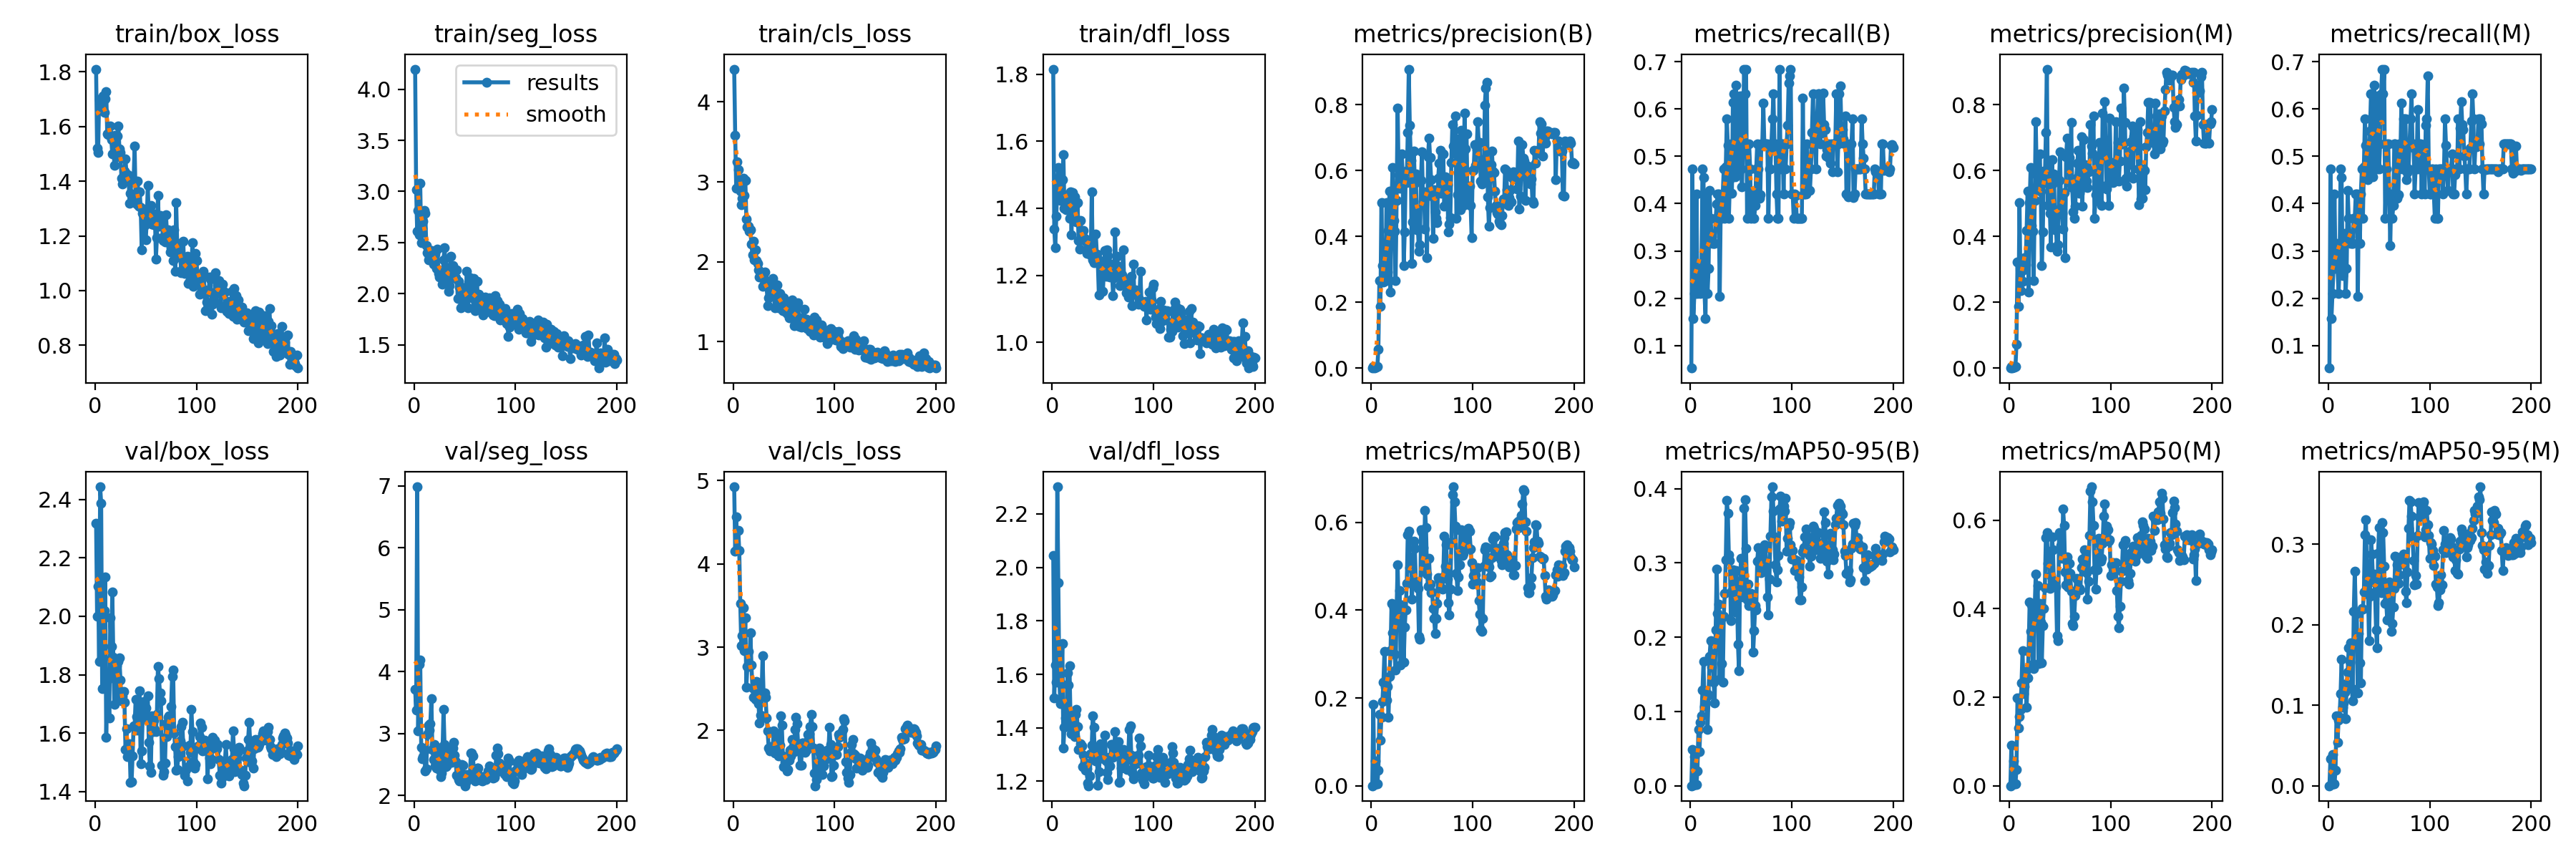

In [17]:
Image("/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-/results.png")

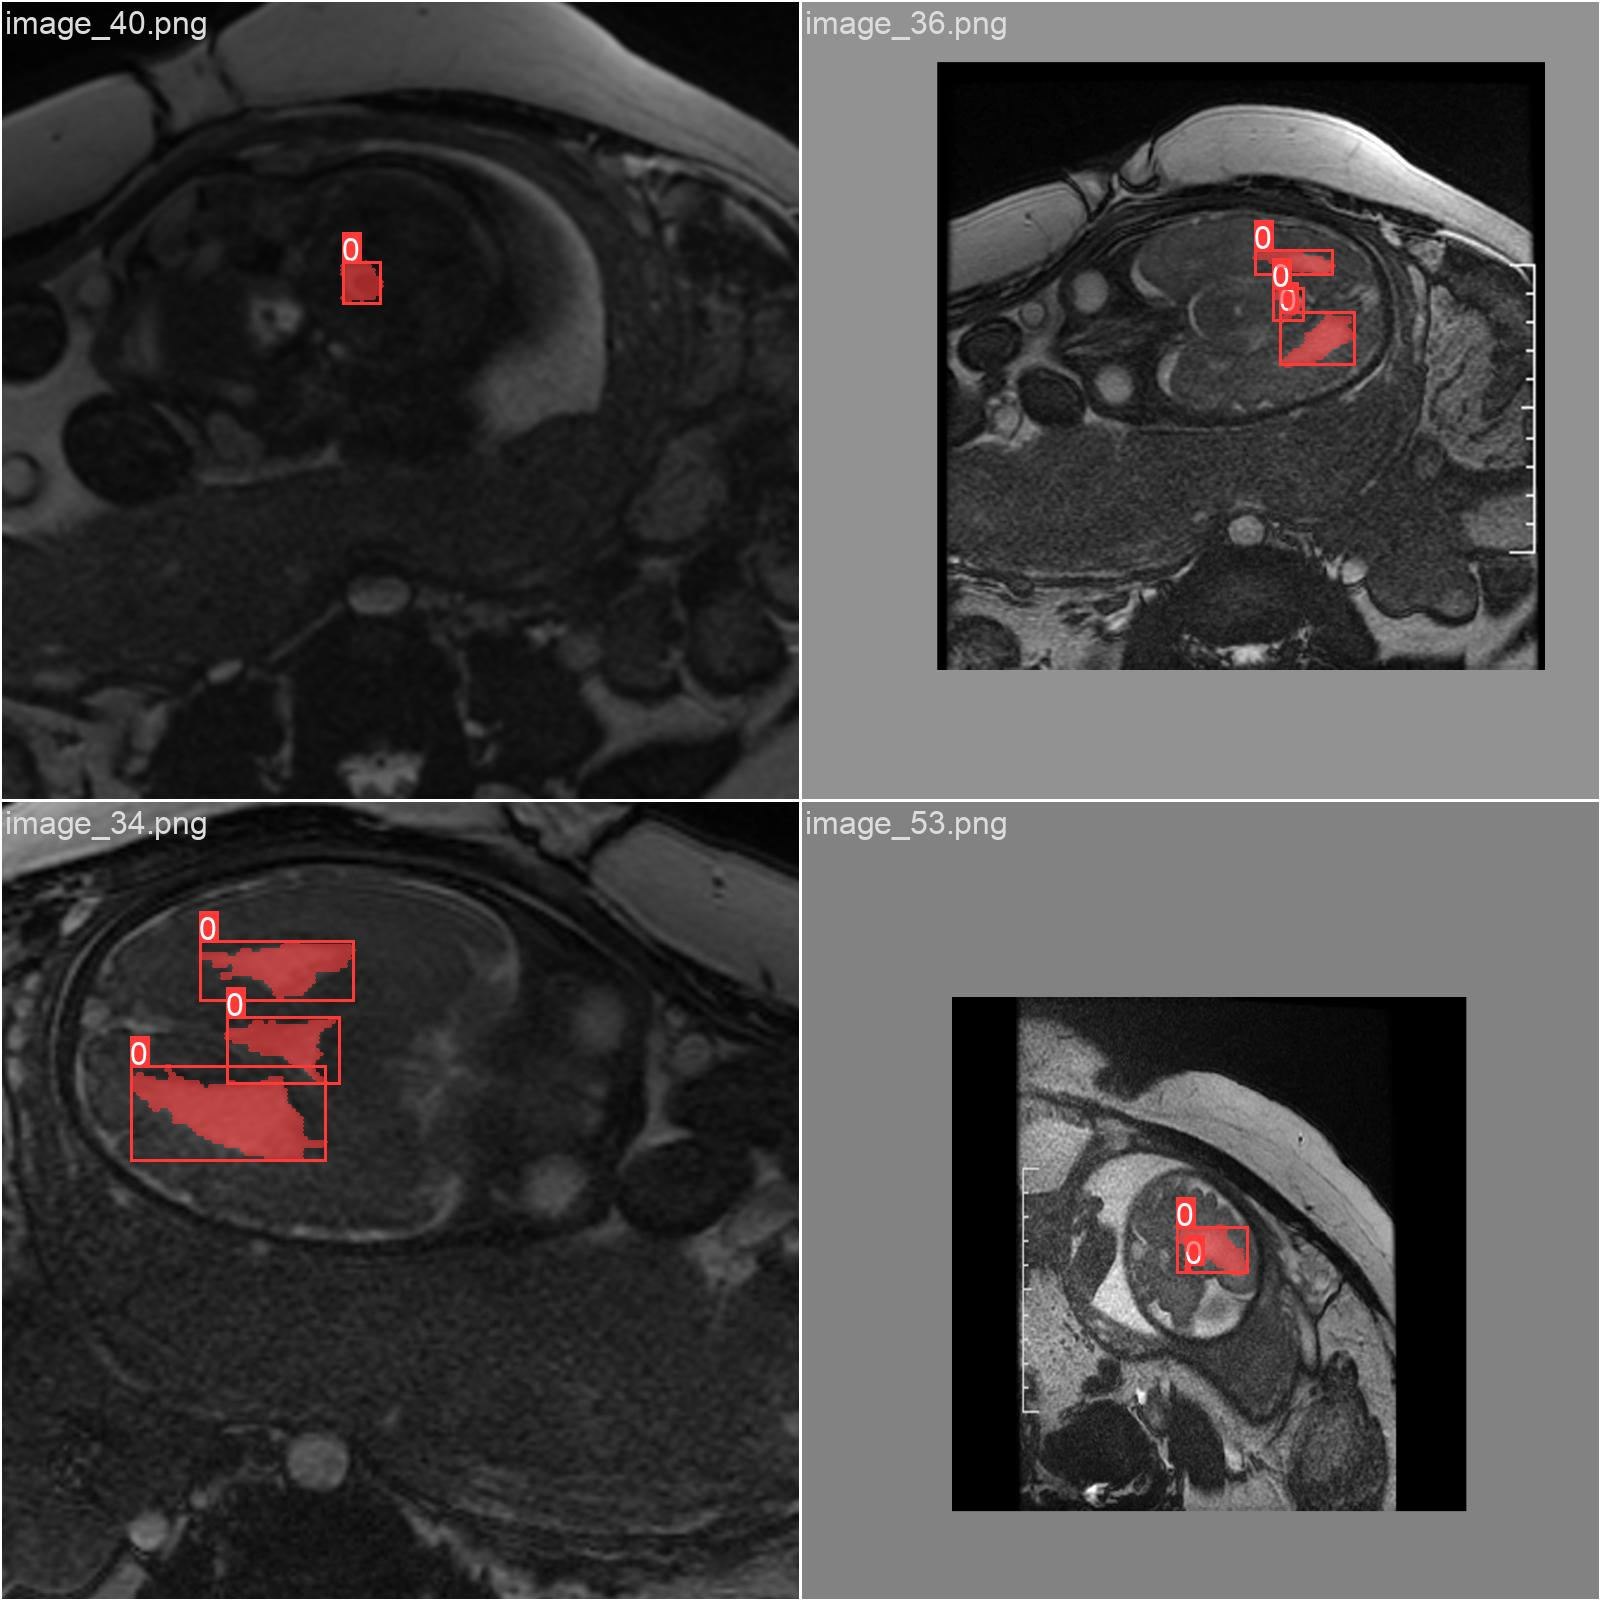

In [19]:
Image(filename='/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-/train_batch4370.jpg', width=900)

**Now to use this trained weights as inference**

In [27]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

Without the above block, the below block won't run properly

In [28]:
#List the saved models in 'runs' directory. Note that you will see multiple 'train' subdirectories numbered 1, 2, 3, etc. The exact number depends on the number of epochs.
%ls /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-/weights

best.pt  last.pt


In [29]:
my_new_model_latest = YOLO('/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-/weights/last.pt') #latest model
my_new_model_best = YOLO('/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-/weights/best.pt') #best model


In [25]:
new_image = '/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/left_VM_test_transverse.jpg'
new_results_best = my_new_model_best.predict(new_image, conf=0.2)  #Adjust conf threshold
new_results_latest = my_new_model_latest.predict(new_image, conf=0.2)  #Adjust conf threshold



image 1/1 /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/left_VM_test_transverse.jpg: 800x800 1 VM, 14.3ms
Speed: 5.3ms preprocess, 14.3ms inference, 5.1ms postprocess per image at shape (1, 3, 800, 800)

image 1/1 /content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/left_VM_test_transverse.jpg: 800x800 3 VMs, 14.9ms
Speed: 5.6ms preprocess, 14.9ms inference, 4.8ms postprocess per image at shape (1, 3, 800, 800)


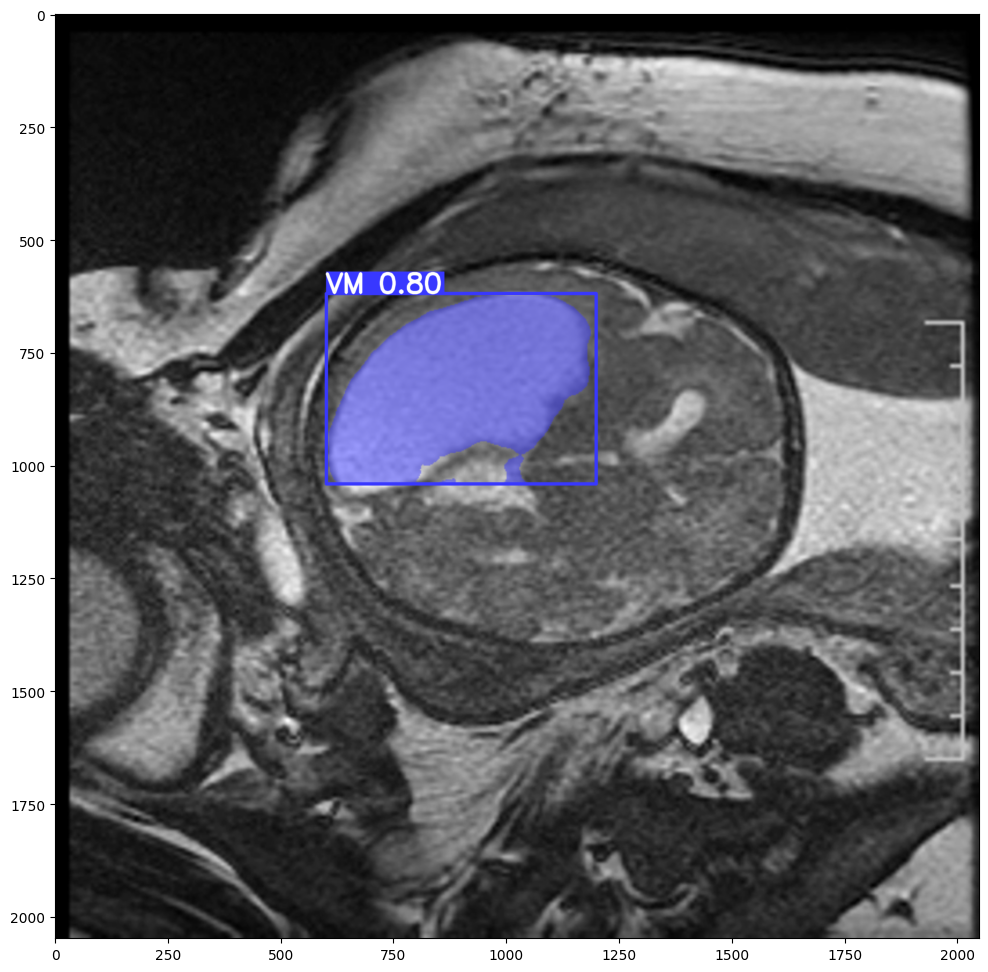

In [26]:
new_result_array = new_results_best[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

In [33]:
# Export the model
my_new_model_best.export(format='onnx', imgsz=[800,800])
my_new_model_latest.export(format='onnx', imgsz=[800,800])

#imgsz is the size of the input image

Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.30GHz)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-/weights/best.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) ((1, 37, 13125), (1, 32, 200, 200)) (6.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 25.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.1s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 10.9s, saved as '/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-/weights/best.onnx' (12.7 MB)

Export complete (13.0s)
Results saved to /content/drive

'/content/drive/MyDrive/ColabNotebooks/YOLOv8/transverse/yolo_dataset/results/200_epochs-/weights/last.onnx'